In [ ]:
# Please check the file Readme.pdf, that file contains a more detailed explanation of the homework
# this is just the code I used to generate plots or cvs datafiles.

In [73]:
import matplotlib.pyplot as plt

class Orbit:
    def __init__(self, seed):
        self.seed = seed
        self.n = 0
        self.previous = None
        self.X = []
        self.Y = []

    def f(self, x):
        result = None
        if (0 <= x and x < 0.5):
            result = 2*x
        elif (0.5 <= x and x < 1):
            result = 2*x - 1
        return result

    def step(self):
        if self.n == 0:
            self.previous = self.f(self.seed)
        else:
            self.previous = self.f(self.previous)
        self.Y.append(self.previous)
        self.X.append(self.n)
        result = self.previous
        self.n = self.n + 1
        return self.n, result

In [98]:
MAX = 100
seeds = [0, 0.001, 0.25, 0.5, 0.999]
seeds = [0.011, 0.03141, 0.3114, 0.14913, 0.81441]
total_seeds = len(seeds)
Os=[]

#Initalization
format_str = "%d"
values = [0]
# this is used to generate a formatted output on a pipe to dump the results on a text file to later upload on the TeX file.
for seed in seeds:
    format_str = format_str + ",%f"
    Os.append(Orbit(seed))
    values.append(seed)
# REMOVE THIS COMMENT TO PRINT THE HEADER ON THE OUTPUT
#print(format_str % tuple(values))

for i in range(0, MAX):
    values = [i+1]
    for o in Os:
        n, result = o.step()
        values.append(result)
# REMOVE THIS COMMENT TO PRINT THE VALUES ON THE OUTPUT
#    print(format_str % tuple(values))

row_index = 0
'''
fig, axes = plt.subplots(total_seeds, 1, sharex=True, figsize=(5,10), dpi=90)

for o in Os:
    axes[row_index].plot(o.X, o.Y)
    axes[row_index].set_title(r'Seed: ${}$'.format(o.seed))
    axes[row_index].set_ylabel(r'$F^n(x_n)$')
    row_index = row_index + 1


fig.subplots_adjust(hspace=.5,wspace=3.5)
'''
# REMOVE THIS COMMENT TO SAVE THE IMAGE ON DISK.
# plt.savefig('./plots_v2.png')
#plt.show()
#plt.plot(Os[3].Y,Os[4].Y)

a = np.array(Os[3].Y)
b = np.array(Os[4].Y)

a = a.reshape((50,2))
b = b.reshape((50,2))

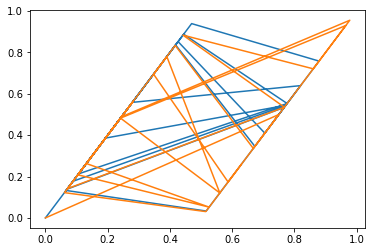

In [100]:
plt.plot(a[:,0], a[:,1])
plt.plot(b[:,0], b[:,1])

plt.savefig('./plots_par.png')

In [61]:
from sympy import *

class Orbit:
    def __init__(self, seed):
        self.seed = seed
        self.n = 0
        self.previous = None
        self.X = []
        self.Y = []
        self.x = symbols('x')
        self.symbfn_1 = 2*self.x
        self.symbfn_2 = 2*(self.x)-1

    def f(self, x_in):
        result = None
        if (0 <= x_in and x_in < 0.5):
            result = self.symbfn_1.subs(self.x, x_in)
        elif (0.5 <= x_in and x_in < 1):
            result = self.symbfn_2.subs(self.x, x_in)
        return result

    def step(self):
        if self.n == 0:
            self.previous = self.f(self.seed)
        else:
            self.previous = self.f(self.previous)
        self.Y.append(self.previous)
        self.X.append(self.n)
        result = self.previous
        self.n = self.n + 1
        return self.n, result

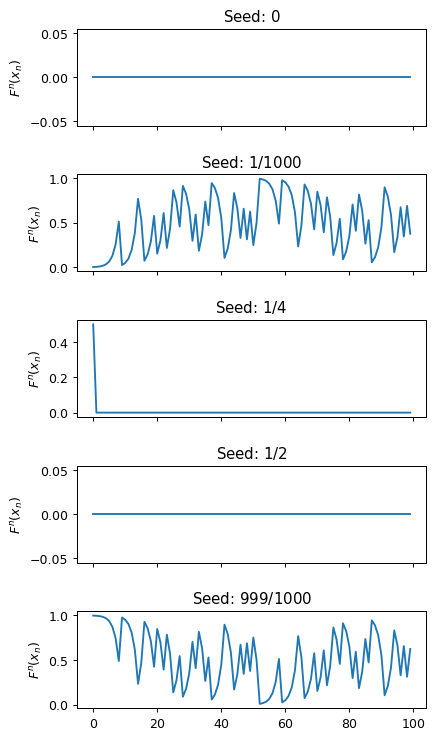

In [64]:
MAX = 100
seed_1, seed_2, seed_3, seed_4, seed_5, seed_6 = symbols('seed_1 seed_2 seed_3 seed_4 seed_5 seed_6')
seed_1 = 0
seed_2 = Rational(1,1000)
seed_3 = Rational(1,4)
seed_4 = Rational(1,2)
seed_5 = Rational(999,1000)
seed_6 = Rational(1,9)

seeds = [seed_1, seed_2, seed_3, seed_4, seed_5]
total_seeds = len(seeds)
Os=[]

#Initalization
format_str = "%d"
values = [0]
for seed in seeds:
    format_str = format_str + ",%f"
    Os.append(Orbit(seed))
    values.append(seed)
# REMOVE THIS COMMENT TO PRINT THE HEADER ON THE OUTPUT
# print(format_str % tuple(values))

for i in range(0, MAX):
    values = [i+1]
    for o in Os:
        n, result = o.step()
        values.append(result)
# REMOVE THIS COMMENT TO PRINT THE VALUES ON THE OUTPUT
#    print(format_str % tuple(values))

row_index = 0

fig, axes = plt.subplots(total_seeds, 1, sharex=True, figsize=(5,10), dpi=90)

for o in Os:
    axes[row_index].plot(o.X, o.Y)
    axes[row_index].set_title(r'Seed: ${}$'.format(o.seed))
    axes[row_index].set_ylabel(r'$F^n(x_n)$')
    row_index = row_index + 1
    
fig.subplots_adjust(hspace=.5,wspace=3.5)
# REMOVE THIS COMMENT TO SAVE THE IMAGE ON DISK.
# plt.savefig('./plots_weird_v2.png')
plt.show()

In [65]:
print ("My machine epsilon is: {}".format(np.finfo(np.float).eps))

My machine epsilon is: 2.220446049250313e-16
